## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [368]:
# Setup

import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline      

# Setting the seed to get the same answers on each run

random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [369]:
# loading Datasets

ab_test_data = pd.read_csv('ab_data.csv')
country_data = pd.read_csv('countries.csv')

In [370]:
# Data Preview

ab_test_data.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [371]:
# Number of rows

num_rows = ab_test_data.shape[0]
print(f'Number of rows: {num_rows}')

Number of rows: 294478


c. The number of unique users in the dataset.

In [372]:
# Number of unique users

num_unique_users = ab_test_data.user_id.nunique()
print(f'Number of unique users: {num_unique_users}')

Number of unique users: 290584


d. The proportion of users converted.

In [373]:
# Conversion rate

conversion_rate = ab_test_data.converted.mean()
print(f'The proportion of users converted: {conversion_rate}')

The proportion of users converted: 0.11965919355605512


e. The number of times the `new_page` and `treatment` don't line up.

In [374]:
# Page group mismatch

control_got_new_page = ab_test_data.query('group == "control" and landing_page == "new_page"').shape[0]

treatment_got_old_page = ab_test_data.query('group == "treatment" and landing_page == "old_page"').shape[0]


group_page_mismatch =  control_got_new_page + treatment_got_old_page

print(f'Number of times group and page don\'t line up: {group_page_mismatch}') 

Number of times group and page don't line up: 3893


f. Do any of the rows have missing values?

In [375]:
# Checking for missing values

missing_values = ab_test_data.isnull().sum()
missing_values.name = 'Missing value information'

print(missing_values.name)
missing_values

Missing value information


user_id         0
timestamp       0
group           0
landing_page    0
converted       0
Name: Missing value information, dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [376]:
# Handling rows with group-page mismatch

# Extracting the indices of problematic rows

control_got_new_page_idx =   ab_test_data.query('group == "control" and landing_page == "new_page"').index.tolist()

treatment_got_old_page_idx = ab_test_data.query('group == "treatment" and landing_page == "old_page"').index.tolist()


group_page_mismatch_idx = pd.Index(control_got_new_page_idx + treatment_got_old_page_idx)

In [377]:
# Dropping problematic rows

ab_data = ab_test_data.drop(index = group_page_mismatch_idx)

In [378]:
# Checking if the rows were correctly removed

ab_data[((ab_data['group'] == 'treatment') == (ab_data['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [379]:
# Unique users in ab_data

num_unique_users =  ab_data.user_id.nunique()
print(f'Number of unique users in transformed data: {num_unique_users}')

Number of unique users in transformed data: 290584


b. There is one **user_id** repeated in **df2**.  What is it?

In [380]:
# Checking for repeated users

repeated_users = ab_data.user_id.value_counts().where(ab_data.user_id.value_counts() > 1).dropna().index[0]

print(f'Id of repeated users: {repeated_users}')

Id of repeated users: 773192


c. What is the row information for the repeat **user_id**? 

In [381]:
# Row information of repeated user

repeated_user_data =  ab_data.query('user_id == @repeated_users')

print("Row Information of Repeated User")
repeated_user_data

Row Information of Repeated User


,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [382]:
# Dropping the reduntant 

ab_data.drop(repeated_user_data.index[0], inplace = True)

# Final Preview

ab_data.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?`

In [383]:
# Calculating the overall conversion ratio

conversion_ratio = ab_data.converted.mean()
print(f'Conversion ratio agnostic of landing page version: {conversion_ratio}')

Conversion ratio agnostic of landing page version: 0.11959708724499628


b. Given that an individual was in the `control` group, what is the probability they converted?

In [384]:
# Conversion ratio in control group

control_group_conversions = ab_data.query('group == "control"').converted.mean()

print(f'Probablity of conversion in control group: {control_group_conversions}')

Probablity of conversion in control group: 0.1203863045004612


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [385]:
# Conversion ratio in treatment group

treatment_group_conversions = ab_data.query('group == "treatment"').converted.mean()
   
print(f'Probablity of conversion in treatment group: {treatment_group_conversions}')

Probablity of conversion in treatment group: 0.11880806551510564


d. What is the probability that an individual received the new page?

In [386]:
# Proportion of users recieving the new landing page

new_page_user_ratio = ab_data.query('landing_page == "new_page"').shape[0]/ab_data.shape[0]

print(f'Probablity of an recieving the new version of landing page: {new_page_user_ratio}')

Probablity of an recieving the new version of landing page: 0.5000619442226688


e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**Inference from Calculations**

The calculations show that the control group has had a higher conversion ratio than the treatment group suggesting the new page is ineffective in driving more conversions. This result, however, needs to be tested for statistical significance since we have only worked with a sample of the population. Thus, I think there isn't sufficient evidence to explain the performance of the new page. 

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

*Hypotheses in Words*:

Null Hypothesis: 

The proportion of users converted in the treatment group is **less than or equal** to the proportion of users converted in the control group. 

Alternate Hypothesis: 

The proportion of users converted in the treatment group is **greater than** the proportion of users converted in the treatment group. 



*Hypotheses in Notation*:

Null Hypothesis:     

$p_{new}$ - $p_{old}$ $≤$  $0$


Alternate Hypothesis:

$p_{new}$ - $p_{old}$ $>$  $0$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [387]:
# p_new under the null

p_new = conversion_ratio

print(f'Conversion rate for new page under the null: {p_new}')

Conversion rate for new page under the null: 0.11959708724499628


b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [388]:
# p_old under the null 

p_old = conversion_ratio

print(f'Conversion rate for old page under the null: {p_old}')

Conversion rate for old page under the null: 0.11959708724499628


c. What is $n_{new}$?

In [389]:
# Number of individuals in treatment group

n_new = ab_data.query('group == "treatment"').shape[0]

print(f'Number of individuals in the treatment group: {n_new}')

Number of individuals in the treatment group: 145310


d. What is $n_{old}$?

In [390]:
# Number of indviduals in control group

n_old = ab_data.query('group == "control"').shape[0]

print(f'Number of individuals in control group: {n_old}')

Number of individuals in control group: 145274


e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [391]:
# New page conversion ratio under null simulation

''' Reference for the next line of code: 
    https://github.com/Abhishek20182/Analyze-AB-Test-Results/blob/master/Analyze_ab_test_results_notebook.ipynb
    under the MIT License  '''

new_page_converted = np.random.choice(2, n_new, p = [p_new, 1- p_new])

print(f'Conversion ratio for new page under null simulation: {new_page_converted.mean()}')

Conversion ratio for new page under null simulation: 0.8787557635400179


f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [392]:
# Old page converion ratio under null simulation

old_page_converted = np.random.choice(2,n_old, p = [p_old, 1 - p_old])

print(f'Conversion ratio for old page under null simulation: {old_page_converted.mean()}')

Conversion ratio for old page under null simulation: 0.8803020499194625


g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [393]:
# Observed difference under the null simulation

observed_diff_in_simulation = new_page_converted.mean() -  old_page_converted.mean()

print(f'Observed difference under null simulation: {observed_diff_in_simulation}')

Observed difference under null simulation: -0.0015462863794445392


h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [394]:
# Conducting 10000 simulations under the null hypothesis

p_diffs = []

for _ in range(10000):
    
    simulated_new_page_converted = np.random.choice(2, n_new, p = [p_new, 1 - p_new])
    simulated_old_page_converted = np.random.choice(2, n_new, p = [p_old, 1- p_old])
    
    diff = simulated_new_page_converted.mean() - simulated_old_page_converted.mean()
    
    p_diffs.append(diff)
    



i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

In [395]:
# Computing the observed difference from experiment data

observed_difference = treatment_group_conversions - control_group_conversions

print(f'Observed difference from user data: {observed_difference}')

Observed difference from user data: -0.0015782389853555567


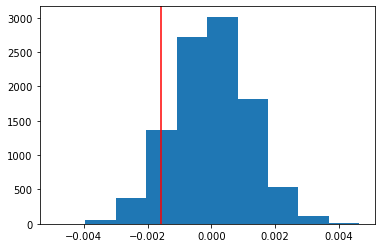

In [396]:
# Plot of difference in conversion rates from the simulations

plt.hist(p_diffs);
plt.axvline(observed_difference, color = 'red');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [397]:
# Calculating the p-value
 
p_value = np.sum([True if diff > observed_difference else False for diff in p_diffs])/len(p_diffs)

print(f'p-value: {p_value}')

p-value: 0.9081


k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Explanation & Intepretation of p-value**  

We calculated the probablity of finding an observation in favour of the alternate hypothesis given the null hypothesis is true. In this case, it was the mean of all values to the right of our observation.  In scientfic studies, this value is called the p-value - it is a conditional probablity of observing a certain statistic given the null hypothesis is true.  

The p-value is used to evaluate the statistical significance of results by comparing it with a certain significance level.  In this case, our p-value exceeds our significance level of 0.05 and therefore we fail to reject the null hypothesis. 

This suggests that there is no difference between the conversion rates of the new & old pages.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [398]:
# Calculating parameters for use in builtin function

import statsmodels.api as sm

convert_old = ab_data.query('landing_page == "old_page"')['converted'].sum()
convert_new = ab_data.query('landing_page == "new_page"')['converted'].sum()

n_old =  ab_data.query('landing_page == "old_page"').shape[0]
n_new =  ab_data.query('landing_page == "new_page"').shape[0]

print(f'Number of conversions in  control group: {convert_old}')
print(f'Number of conversions in treatment group: {convert_new}')
print(f'Number of users who were shown the old page: {n_old}')
print(f'Number of user who were shown the new page: {n_new}') 

Number of conversions in  control group: 17489
Number of conversions in treatment group: 17264
Number of users who were shown the old page: 145274
Number of user who were shown the new page: 145310


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [399]:
# Calculating z-score & p-value

z_score, p_value =   sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative = 'larger')

print(f'z-score: {z_score}')
print(f'p-value: {p_value}')

z-score: -1.3109241984234394
p-value: 0.9050583127590245


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Discussing z-score & Comparing p-value Obtained Earlier**

The z-score is measure of how many standard deviations away the observed value is from the mean of the standard normal distribution. The p-value measures the probablity of finding an observation that many standard deviations away from the mean. 

In our context, the z score measured how many standard deviations away our observed difference was from the null hypothesized difference of zero and the p-value measured the probablity of finding a value beyond the 
z-score.

The p-value calculated using the built-in function is 0.90 which is greater than our type 1 error rate threshold of 0.05 
indicating that our results are not statistically significant.

Therefore the p-values calculated in the 2 parts agree with each other. 

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

Since oour output varibale is categorical, we should be performing a **logistic regression**. 

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [400]:
# Adding the intercept and dummy variables

ab_data['intercept'] = 1

ab_data[['control','ab_page']] = pd.get_dummies(ab_data['group'])

c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [401]:
# Fitting the log model to study the effect of landing page on conversion rate

import statsmodels.api as sm

log_model = sm.Logit(ab_data['converted'], ab_data[['ab_page','intercept']])

results = log_model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [402]:
# Summarizing results

print('Summary of Results:\n')
results.summary2()

Summary of Results:



<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212780.3502
Date:               2021-06-16 15:44 BIC:              212801.5095
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           1                LL-Null:          -1.0639e+05
Df Residuals:       290582           LLR p-value:      0.18988    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
==================================================================

"""

In [403]:
# Calculating intepretation of variables

inv_effect_of_ab_page  = 1/np.exp(-0.0150)
print(f'Inverse effect of ab_page: {inv_effect_of_ab_page}')

Inverse effect of ab_page: 1.015113064615719


**Intepretation of result** 

Based on the coefficient of ab_page in the logistic regression the odds of conversion increases by a factor of 1.05 when a user is shown the old landing page as opposed to being shown the new landing page. 

The p-value associated with the result is greater than our type 1 error rate and therefore, we fail to reject the null hypothesis. This means we stick to the belief that the difference between the conversion rates of the two versions of the landing page is 0. 

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

The p-value associated with the ab_page is 0.1899. This is because the **null hypothesis** in **logistic regression** is 
that there is **no difference** in conversion rates for the two pages and the **alternative hypothesis** states that there **exists a difference** between the conversion rates of the two pages. 

This is different from the null and alternative hypothesis in part 2, where the null hypothesis is that the difference is less than zero and the alternative states that the difference is greater than zero. Since our observed value was less than zero, we got a p value of 90%.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

The addition of more independant variables would result in a better fit, giving us more accurate predictions. 
The addition of these variables come at the risk of overfitting wherein we'll get a really high value of R² but the model 
would fail to capture the true relationship between the variables.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [404]:
# Adding country information to ab_data

country_data.set_index(country_data['user_id'], inplace = True)
ab_data = ab_data.join(country_data.country, on = ab_data['user_id'])

In [405]:
# Creating the necessary dummy variables

ab_data[['CA','UK','US']] = pd.get_dummies(ab_data['country'])
ab_data.drop('CA', axis = 1, inplace = True)

In [406]:
# Fitting a logistic regression model to study the effect of country

import statsmodels.api as sm

log_model_country = sm.Logit(ab_data['converted'], ab_data[['intercept','UK','US']] )
result = log_model_country.fit()

result.summary2()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212780.8333
Date:               2021-06-16 15:44 BIC:              212812.5723
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           2                LL-Null:          -1.0639e+05
Df Residuals:       290581           LLR p-value:      0.19835    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0375    0.0260  -78.3639  0.0000  -2.0885  -1.9866
UK             0.0507    0.0284    1.7863  0.0740  -0.0049   0.1064
US             0.0408    0.0269    1.5178  0.1291  -0.0119   0.0935
==================================================================

"""

In [407]:
# Calulating intepretation of coefficients

change_in_odds_UK = np.exp(0.0507)
change_in_odds_US = np.exp(0.0408)

print(f'Change in odds due to country being UK: {change_in_odds_UK}')
print(f'Change in odds due to country being US: {change_in_odds_US}')

Change in odds due to country being UK: 1.052007243765014
Change in odds due to country being US: 1.0416437559600236


Intepretation of results

Based on the model, the odds of a user converting is 1.05 time more in UK and 1.04 times more in US as compared to Canada. 
Suggesting that UK users are more likely to convert followed by US and then by Canada.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [408]:
# Defining interaction variables

ab_data['ab_page_with_UK'] = ab_data['UK']*ab_data['ab_page']
ab_data['ab_page_with_US'] = ab_data['US']*ab_data['ab_page']

In [409]:
# Fitting the logistic regression model to study the effect of interaction variables.

log_model = sm.Logit(ab_data['converted'], ab_data[['intercept','ab_page','UK','US','ab_page_with_UK','ab_page_with_US']])
results = log_model.fit()  

print("Summary of Results")
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6
Summary of Results


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212782.6602
Date:               2021-06-16 15:44 BIC:              212846.1381
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           5                LL-Null:          -1.0639e+05
Df Residuals:       290578           LLR p-value:      0.19199    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
------------------------------------------------------------------
                   Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------
intercept         -2.0040   0.0364 -55.0077 0.0000 -2.0754 -1.9326
ab_page           -0.0674   0.0520  -1.2967 0.1947 -0.1694  0.0345
UK                 0.0118   0.0398   0.2957 0.7674 -0.0663  0.0899
US                 0.0175   0.0377   0.4652 0.6418 -0.0563  0.0914
ab_page_with_UK    0.0783   0.0568   1.3783 0.1681 -0.0330  0.1896
ab_page_with_US    0.0469   0.0538   0.8718 0.3833 -0.0585  0.1523
==================================================================

"""

In [410]:
 # Calculating the intepretation of coefficients
    
effect_of_ab_page = 1/np.exp(-0.0674)
effect_of_UK = np.exp(0.0118)
effect_of_US = np.exp(0.0175)
effect_of_ab_page_UK_interaction = np.exp(0.0783)
effect_of_ab_page_US_interaction  = np.exp(0.0469)


print(f'Inverse Effect of new page: {effect_of_ab_page}')
print(f'Effect of UK: {effect_of_UK}')
print(f'Effect of US: {effect_of_US}')
print(f'Effect of page and UK interaction: {effect_of_ab_page_UK_interaction}')
print(f'Effect of page and US interaction: {effect_of_ab_page_US_interaction}')

Inverse Effect of new page: 1.0697232819209153
Effect of UK: 1.011869894648401
Effect of US: 1.0176540221507617
Effect of page and UK interaction: 1.0814470441230692
Effect of page and US interaction: 1.048017202119183


Intepretation of Results


*Efect of page*  
The odds of conversion decreases by a factor 1.07 when a user is shown the new page as opposed to being shown the old page. 

*Effect of country being UK*  
The odds of conversion increases by a factor of 1.01 when a user is based in UK or US than when a user is based in Canada.

*Effect of country being US*  
The odds of conversion increases by a factor of 1.02 due to the interaction effects between the type of page and the location of UK.

*Effect due to interaction effects between variables*  
The odds of conversion increases by a factor of 1.05 due to the interaction effects between the type of page and the location of US. 

<a id='conclusions'></a>
## Conclusions



We used a two fold approach in deciding if the landing page should be upgraded. Based on the results from both of these approaches, I recommend that the company should **continue using the current landing page**. 

In the A/B Test approach, we stuck to our null hypothesis of the difference in conversion rate being less than or equal to zero. And in the Logistic Regression approach, we stuck to our null hypothesis that the difference is zero. 

In both cases, we can definitely conclude that the new landing page does not improve the conversion rate. Therefore it would be reasonable to avoid spending more money into developing & deploying the new landing page.  

## Resources 



Web Resources:

Logistic Reression: https://stats.idre.ucla.edu/stata/output/logistic-regression-analysis/  
Logistic Regression: Chomba Bupe's answer in - https://www.quora.com/What-is-the-mathematical-derivation-of-logistic-regression  
Using the Built-in : https://stackoverflow.com/questions/52670195/using-statsmodels-ztest  
For calcualting p-value: https://stackoverflow.com/questions/4406389/if-else-in-a-list-comprehension 

Books:

Logistic Regression: Chapter 4 in Introduction to Statistical Learning. 